<a href="https://colab.research.google.com/github/pushkal1234/HSE_Competitive-Data-Science/blob/main/Assignment_Neurance_ai_pushkalshuk_gmail_com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center style="font-family:cursive;"><h1 style="font-size:350%; padding: 20px; background: #001f3f;"><b style="color:orange;">Neurance.ai Assignment Submission Notebook</b></h1></center>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 10px; background: #001f3f;"><b style="color:orange;">ABOUT NOTEBOOK</b></h1></center>


<p style="font-size:150%;">This is Light GBM Approach in predicting the drug base_score using the data provided by AI team at Neurance.ai</p>

<h1 style="font-size:180%; color:navy;"><i><b>Steps Performed</b></i></h1>

<ul>
    <li style="font-size:150%;">DESCRIPTIVE STATISTICS</li>
    <li style="font-size:150%;">DATA VISUALIZATION</li>
    <li style="font-size:150%;">DATA PREPROCESSING & FEATURE ENGINEERING</li>
    <li style="font-size:150%;">LIGHT GBM MODEL BUILDING</li>
</ul>

<h1 style="font-size:180%; color:navy;"><i><b>About Dataset</b></i></h1>

<ul>
    <li style="font-size:150%;"> The Dataset provides patient reviews
on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The data was Provided to me by Neurance.ai Team. The Drug Review Data Set is of shape (32165, 8) i.e. It has 7 features and one target variable known as base_score in the train.csv file(train_set) and it contains 10,760 rows along with 7 features in the test set. </li>
    <li style="font-size:150%;">The features are 'name_of_drug' which is the name of the drug, 'use_case_for_drug' which is the condition the patient is suffering from, 'review_by_patient' is the patients review, 'effectiveness_rating' is the 10-star patient rating for the drug, 'drug_approved_by_UIC' is the date of the entry and the 'number_of_times_prescribed' is the number of users who found the review useful. </li>
    <li style="font-size:150%;">Here the base_score is the target variable that needs to be predicted. </li>
</ul>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><b style="color:orange;">Let's Start the Implementation</b></h1></center>

<h1 style="font-size:200%; color:navy;"><i><b>Import Required Libraries and Load Dataset</b></i></h1>

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
test = pd.read_csv('/content/test.csv')

In [3]:
data

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [59]:
y = data['base_score']

In [61]:
y_ = pd.DataFrame(y)

In [62]:
y_

,base_score
0,8.022969
1,7.858458
2,6.341969
3,6.590176
4,6.144782
...,...
32160,6.963020
32161,0.899076
32162,6.241812
32163,7.940428


<h1 style="font-size:200%; color:navy;"><i><b>Descriptive Statistics</b></i></h1>

In [2]:
# describing the data

data.describe()

,patient_id,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000,32165.000000
mean,115487.511052,6.998912,27.893207,6.664261
std,67146.156602,3.274781,35.819035,1.588699
min,9.000000,1.000000,0.000000,0.899076
25%,56922.000000,5.000000,6.000000,6.109307
50%,115776.000000,8.000000,16.000000,6.788245
75%,173562.000000,10.000000,36.000000,7.900790
max,232289.000000,10.000000,771.000000,8.992453


In [3]:
# taking out information from the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


In [4]:
# get the datatype of columns

data.dtypes

patient_id                      int64
name_of_drug                   object
use_case_for_drug              object
review_by_patient              object
effectiveness_rating            int64
drug_approved_by_UIC           object
number_of_times_prescribed      int64
base_score                    float64
dtype: object

In [5]:
# checking if the data contains any NULL values

data.isnull().any()

patient_id                    False
name_of_drug                  False
use_case_for_drug             False
review_by_patient             False
effectiveness_rating          False
drug_approved_by_UIC          False
number_of_times_prescribed    False
base_score                    False
dtype: bool

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA VISUALIZATION</b></i></h1></center>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF NAME OF DRUG / EFFECTIVENESS RATINGS / USE_CASE_FOR_DRUG</b></i></h1>

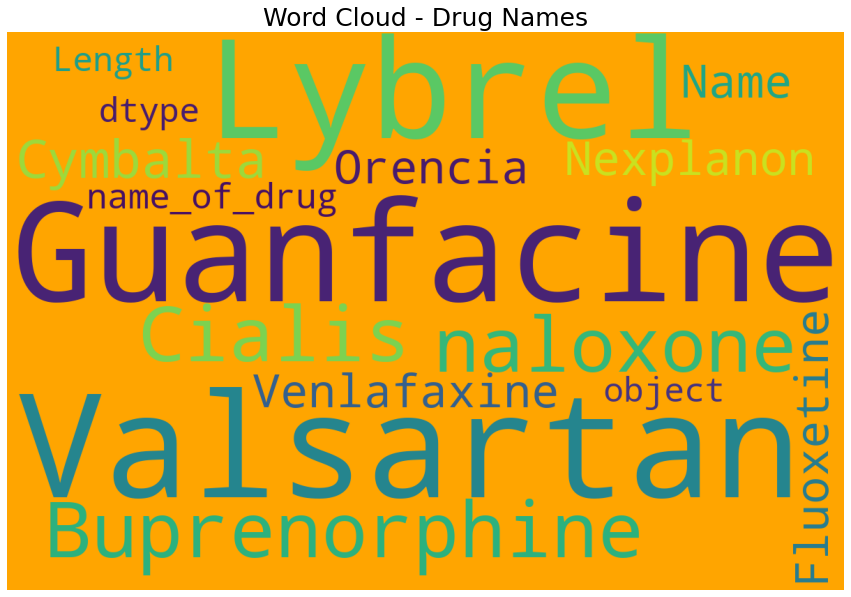

In [16]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(data['name_of_drug']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the DRUG NAMES </li>
<ul>

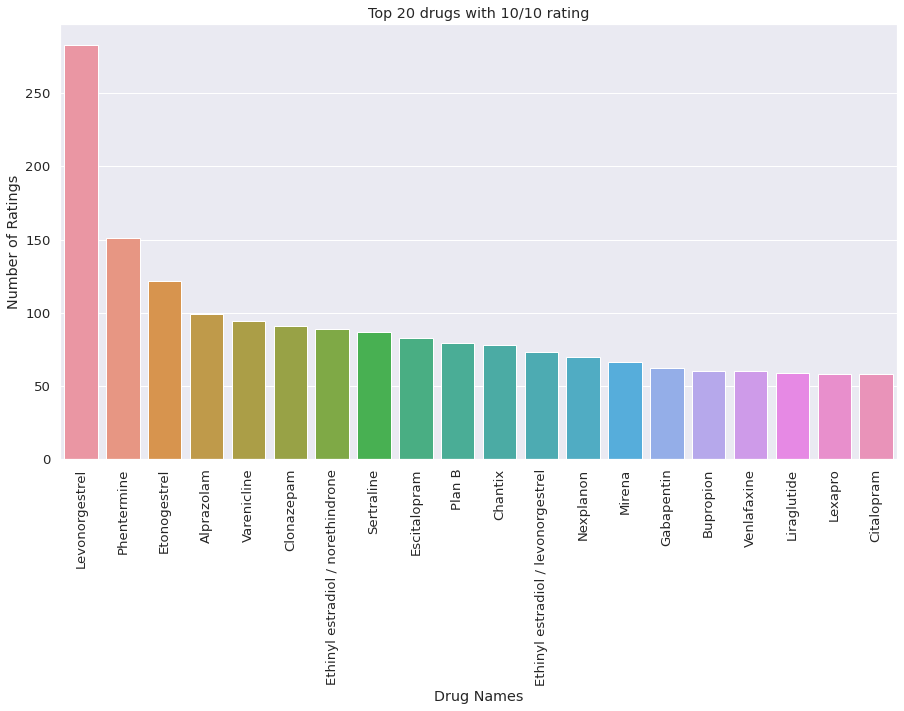

In [17]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.effectiveness_rating == 10, "name_of_drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph which shows the top 20 drugs given in the data set with a rating of 10/10. 'Levonorgestrel' is the drug with the highest number of 10/10 ratings, about 1883 Ratings in the data set for 'Levonorgestrel'. </li>
<ul>

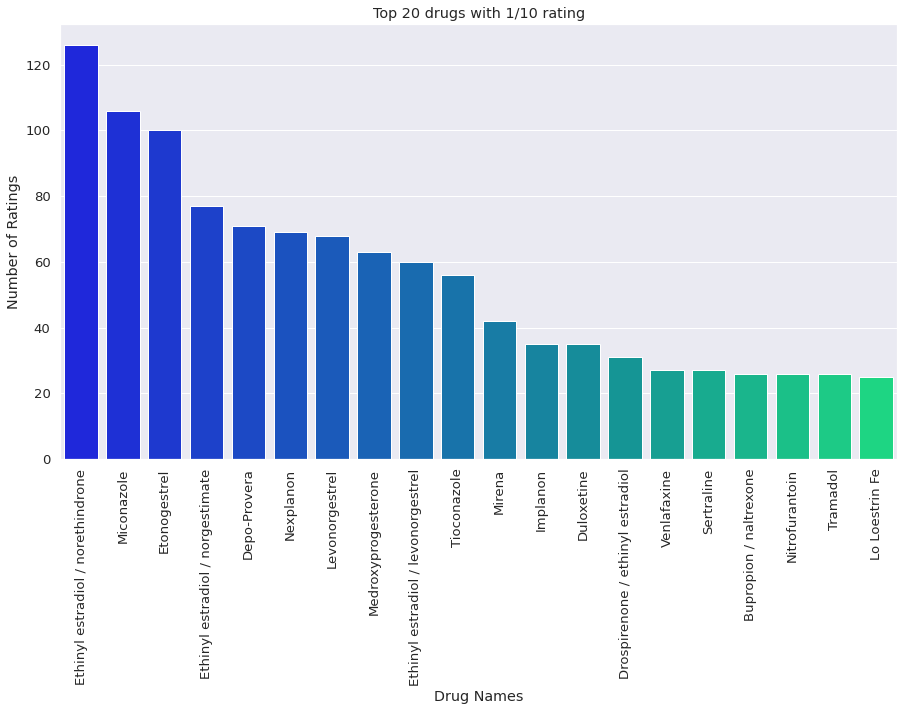

In [18]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.effectiveness_rating == 1, "name_of_drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

<ul>
    <li style="font-size:150%;">The is a bar graph thatshows the top 20 drugs given in the data set with a rating of 1/10. 'Miconazole' is the drug with the highest number of 1/10 ratings, about 767. </li>
<ul>

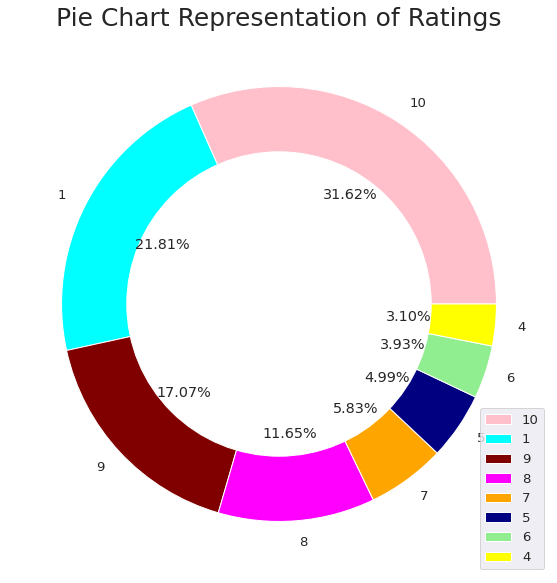

In [19]:
# making a donut chart to represent share of each ratings

size = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
colors = ['pink', 'cyan', 'maroon',  'magenta', 'orange', 'navy', 'lightgreen', 'yellow']
labels = "10", "1", "9", "8", "7", "5", "6", "4"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Ratings', fontsize = 25)
p = plt.gcf()
plt.gca().add_artist(my_circle)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart reprents the Rating of Reviews. </li>
<ul>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

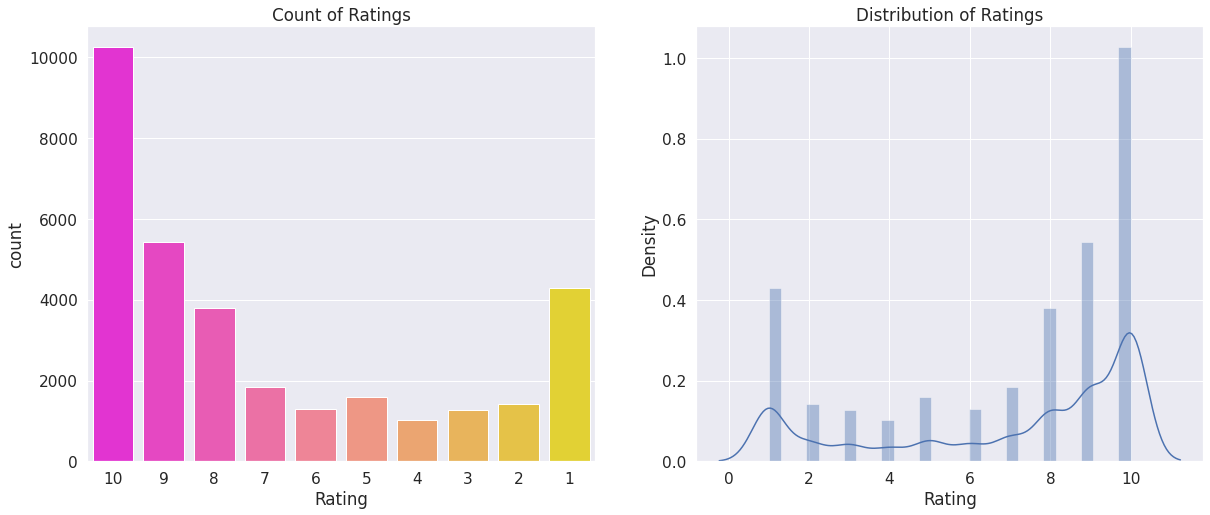

In [20]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['effectiveness_rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['effectiveness_rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

<ul>
    <li style="font-size:150%;">The shows a distribution plot on the right hand side and a bar graph of the same on the left hand side. This shows the distribution of the ratings from 1 to 10 in the data set.</li>
<ul>

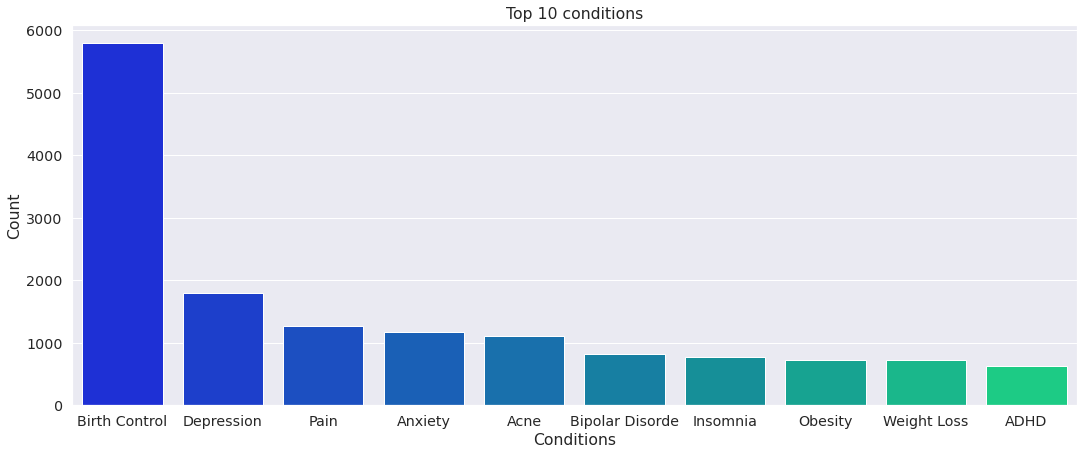

In [21]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(data['use_case_for_drug'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 conditions the people are suffering from. In this data set 'Birth Control' is the most prominent condition by a very big margin followed by Depression and pain.</li>
<ul>

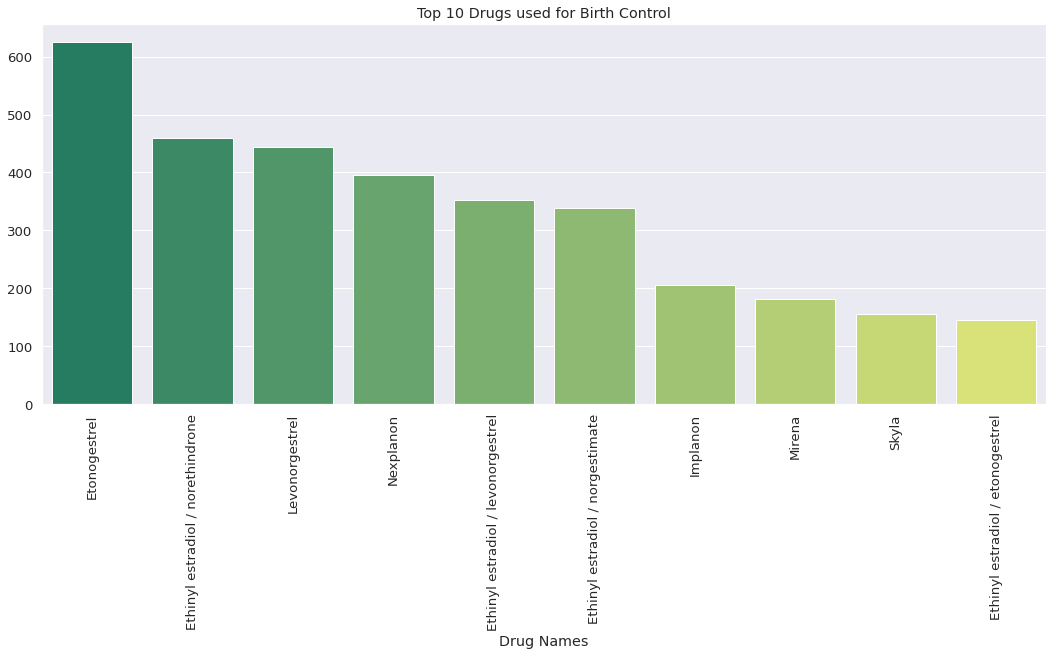

In [22]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df1 = data[data['use_case_for_drug'] == 'Birth Control']['name_of_drug'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<ul>
    <li style="font-size:150%;">The is a bar graph which exhibits the top 10 drug names for the people suffering from Birth Control. In this data set 'Etonogestrel' is the most prominent drug by a very big margin.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS</b></i></h1>

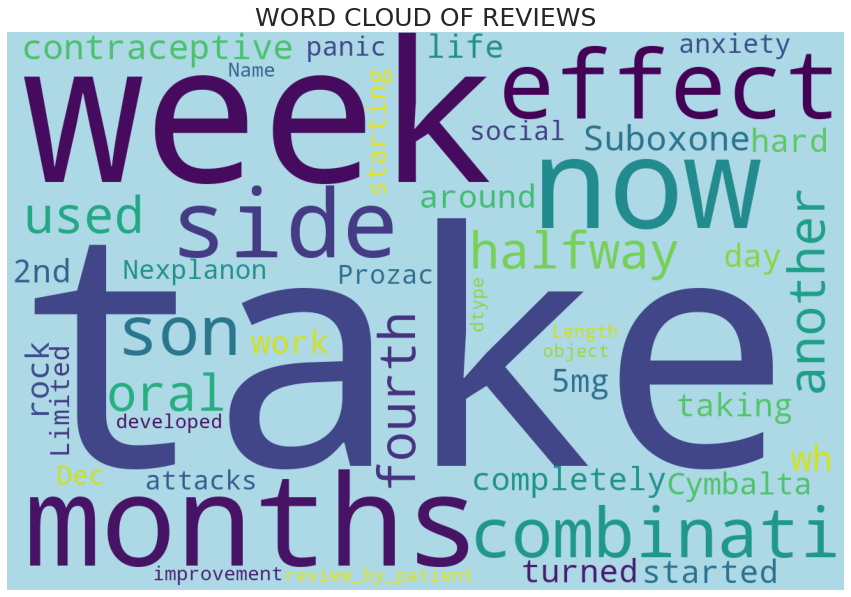

In [23]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review_by_patient']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the reviews.</li>
<ul>

In [76]:
# feature engineering 
# let's make a new column review sentiment 

test.loc[(data['effectiveness_rating'] >= 5), 'Review_Sentiment'] = 1
test.loc[(data['effectiveness_rating'] < 5), 'Review_Sentiment'] = 0

test['Review_Sentiment'].value_counts()

1.0    8084
0.0    2676
Name: Review_Sentiment, dtype: int64

In [77]:
# feature engineering 
# let's make a new column review sentiment 

data.loc[(data['effectiveness_rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['effectiveness_rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

1.0    24169
0.0     7996
Name: Review_Sentiment, dtype: int64

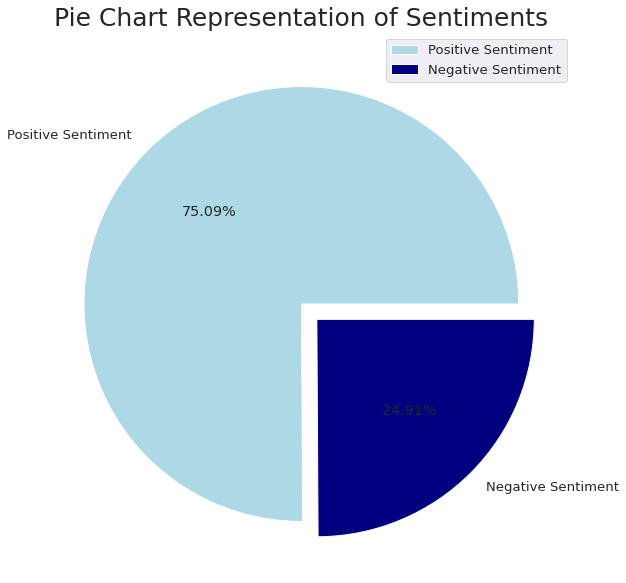

In [24]:
# a pie chart to represent the sentiments of the patients

size = [161491, 53572]
colors = ['lightblue', 'navy']
labels = "Positive Sentiment","Negative Sentiment"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

<ul>
    <li style="font-size:150%;">This Pie Chart represents the Sentiments of the Reviews.</li>
<ul>

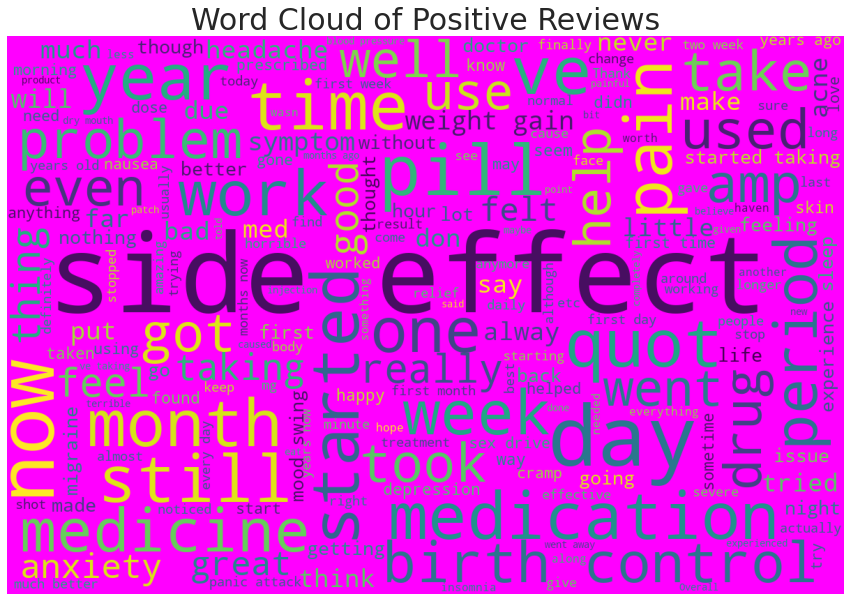

In [26]:

# making Words cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review_by_patient'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'magenta', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the Positive Sentiments.</li>
<ul>

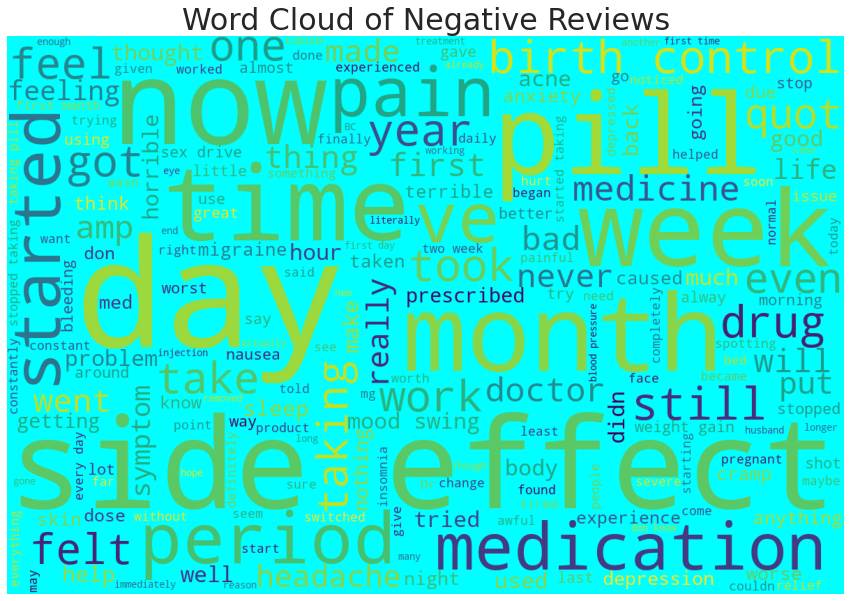

In [27]:
# making wordscloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review_by_patient'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'cyan', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

<ul>
    <li style="font-size:150%;">This is a word cloud for the Negative Sentiments.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF REVIEWS BASED ON DATETIME</b></i></h1>

In [28]:
# converting the date into datetime format
data['drug_approved_by_UIC'] = pd.to_datetime(data['drug_approved_by_UIC'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['drug_approved_by_UIC'].dt.year

# extracting the month from the date
data['month'] = data['drug_approved_by_UIC'].dt.month

# extracting the days from the date
data['day'] = data['drug_approved_by_UIC'].dt.day

In [78]:
# converting the date into datetime format
test['drug_approved_by_UIC'] = pd.to_datetime(test['drug_approved_by_UIC'], errors = 'coerce')

# now extracting year from date
test['Year'] = test['drug_approved_by_UIC'].dt.year

# extracting the month from the date
test['month'] = test['drug_approved_by_UIC'].dt.month

# extracting the days from the date
test['day'] = test['drug_approved_by_UIC'].dt.day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


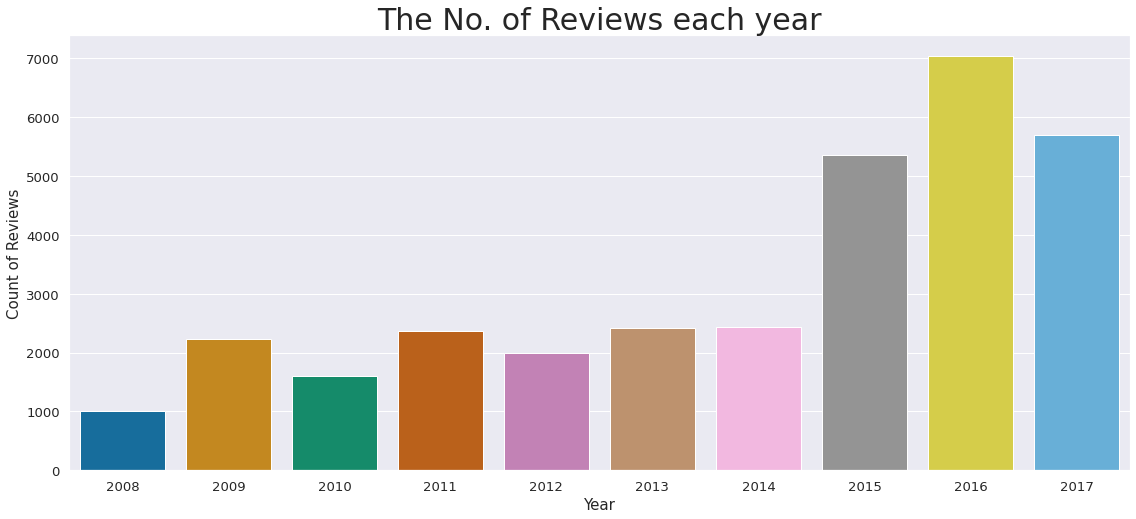

In [29]:
# looking at the no. of reviews in each of the year

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['Year'], palette ='colorblind')
plt.title('The No. of Reviews each year', fontsize = 30)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per year. It can be inferred that most ratings are given in 2016 and 2008 has the least number of reviews.</li>
<ul>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


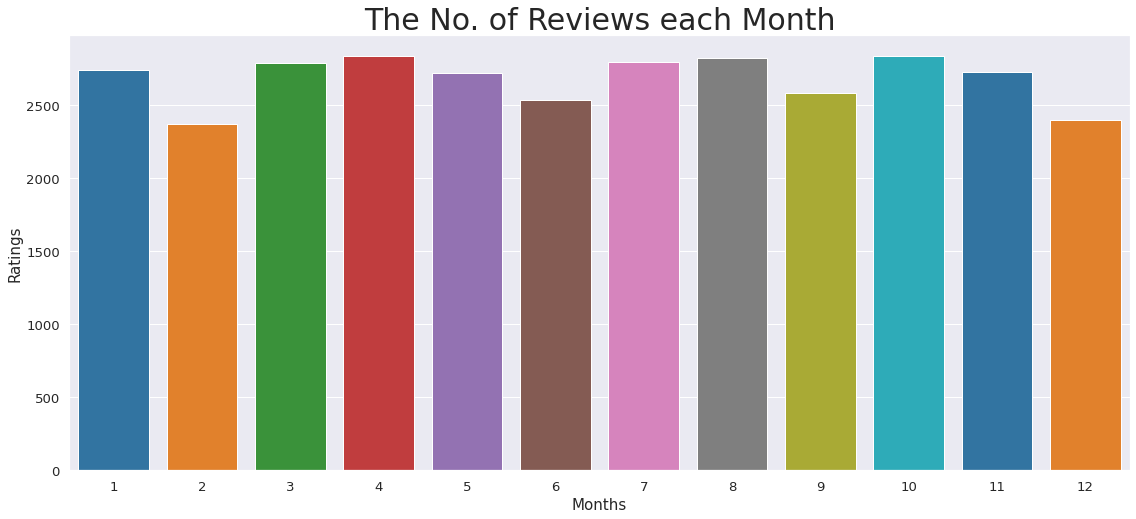

In [30]:
# looking at the no. of reviews in each of the months

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['month'], palette ='tab10')
plt.title('The No. of Reviews each Month', fontsize = 30)
plt.xlabel('Months', fontsize = 15)
plt.ylabel('Ratings', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per month.</li>
<ul>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


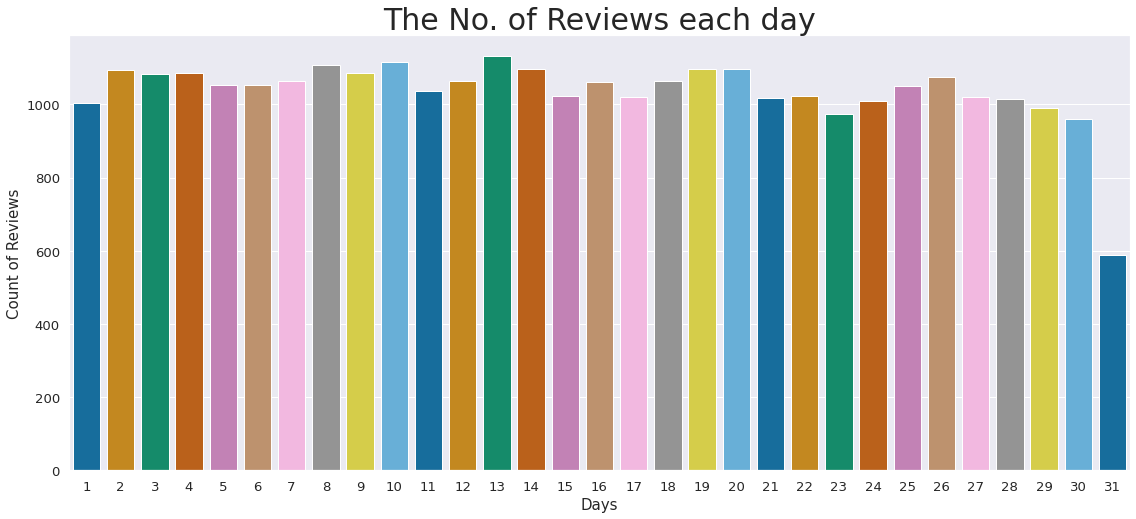

In [31]:
# looking at the no. of reviews in each of the day

plt.rcParams['figure.figsize'] = (19, 8)
sns.countplot(data['day'], palette ='colorblind')
plt.title('The No. of Reviews each day', fontsize = 30)
plt.xlabel('Days', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">The is a Bar graph that shows the number of reviews in the data set per day.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>VISUALIZATION OF USEFUL COUNT</b></i></h1>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


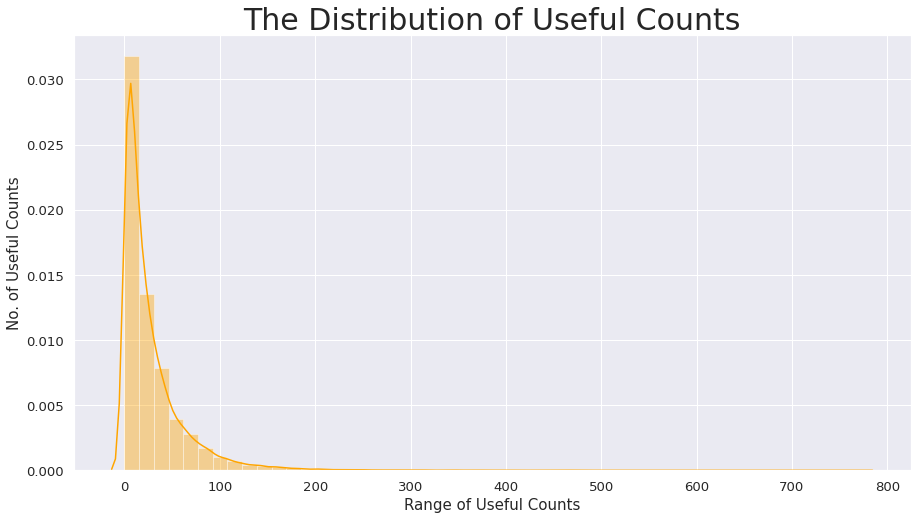

In [32]:
# plotting a dist plot

plt.rcParams['figure.figsize'] = (15, 8)
sns.distplot(data['number_of_times_prescribed'], color = 'orange')
plt.title('The Distribution of Useful Counts', fontsize = 30)
plt.xlabel('Range of Useful Counts', fontsize = 15)
plt.ylabel('No. of Useful Counts', fontsize = 15)
plt.show()

<ul>
    <li style="font-size:150%;">This shows the distribution of the useful Counts in the data set.</li>
<ul>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">DATA PREPROCESSING / FEATURE ENGINEERING</b></i></h1></center>

In [33]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [34]:
data['review_clean'] = review_clean(data['review_by_patient'])

In [79]:
test['review_clean'] = review_clean(test['review_by_patient'])

In [35]:
import nltk 
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [80]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
test['review_clean'] = test['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

**We apply same operations with our test and train set and make it to a feature vector of 23 columns**

<ul>
    <li style="font-size:150%;">I have used textblob module to give the sentiment polarity of the review. This polarity is given to both the cleaned and uncleaned review</li>
<ul> 

In [37]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [81]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
test['review_clean'] = test['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [38]:
data.head(3)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,Year,month,day,Review_Sentiment,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,2012,5,20,1.0,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,2010,4,27,1.0,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,2009,12,14,1.0,use take anoth oral contracept 21 pill cycl ha...


In [39]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [40]:
data['sentiment'] = sentiment(data['review_by_patient'])

In [82]:
test['sentiment'] = sentiment(test['review_by_patient'])

In [41]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [83]:
test['sentiment_clean'] = sentiment(test['review_clean'])

In [42]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_ss'] = review_clean(data['review_by_patient'])
data['sentiment_clean_ss'] = sentiment(data['review_clean_ss'])

In [84]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
test['review_clean_ss'] = review_clean(test['review_by_patient'])
test['sentiment_clean_ss'] = sentiment(test['review_clean_ss'])

In [43]:
data = data.dropna(how="any", axis=0)

In [85]:
test = test.dropna(how="any", axis=0)

In [44]:

#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review_by_patient"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review_by_patient"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [86]:

#Word count in each review
test['count_word']=test["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
test['count_unique_word']=test["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
test['count_letters']=test["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
test["count_punctuations"] = test["review_by_patient"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
test["count_words_upper"] = test["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
test["count_words_title"] = test["review_by_patient"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
test["count_stopwords"] = test["review_by_patient"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
test["mean_word_len"] = test["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

<ul>
    <li style="font-size:150%;">The new features engineered are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count,'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review. The date is also divided into three columns which are day, month and year for separate features for training.</li>
<ul> 

In [45]:
data.columns

Index(['patient_id', 'name_of_drug', 'use_case_for_drug', 'review_by_patient',
       'effectiveness_rating', 'drug_approved_by_UIC',
       'number_of_times_prescribed', 'base_score', 'Year', 'month', 'day',
       'Review_Sentiment', 'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_ss', 'sentiment_clean_ss', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

<h1 style="font-size:180%; color:orange;"><i><b>CORRELATION MATRIX</b></i></h1>

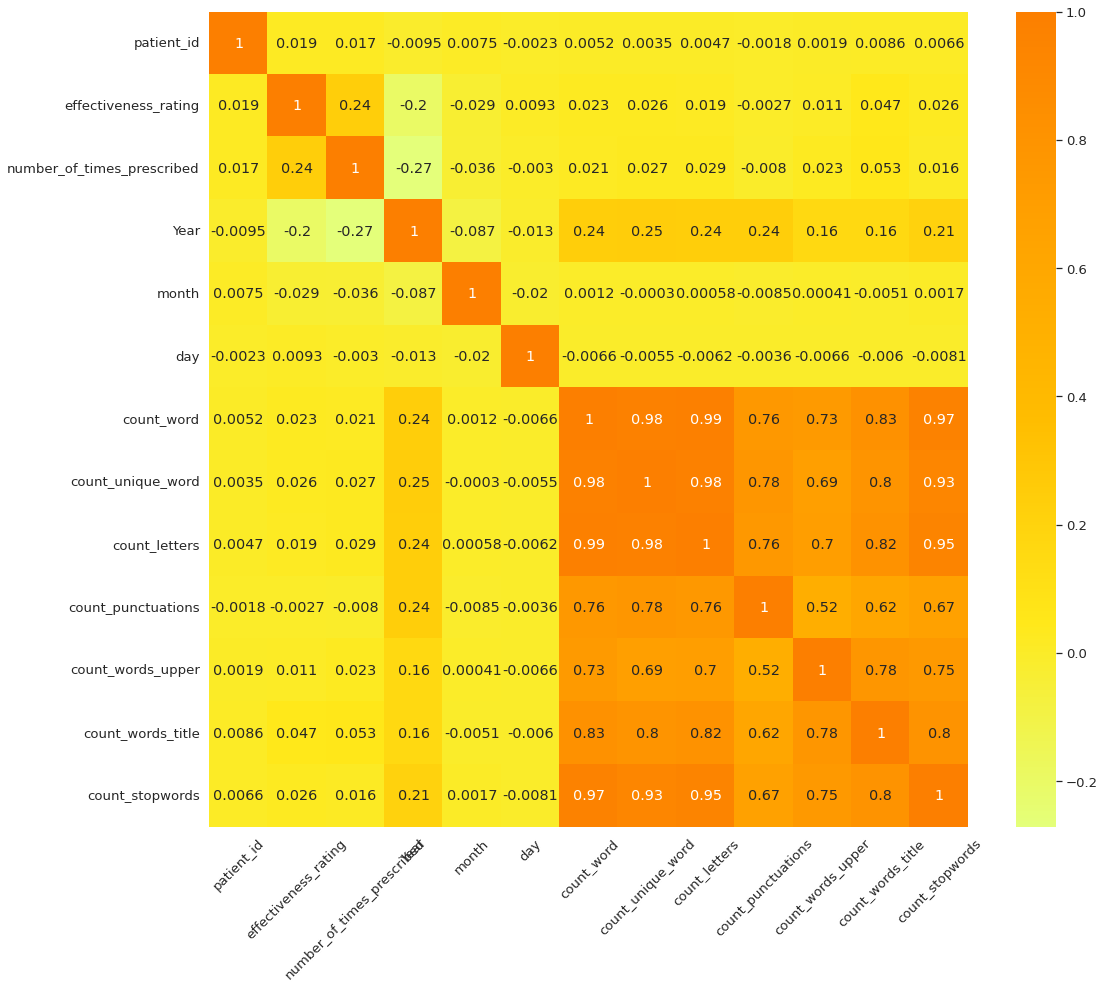

In [46]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

<ul>
    <li style="font-size:150%;">Correlation Heatmap is plotted using seaborn which contains all the new features engineered and the old features.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>LABEL ENCODING</b></i></h1>

In [71]:

# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['name_of_drug', 'use_case_for_drug', 'review_by_patient', 'review_clean', 'review_clean_ss']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

In [89]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['name_of_drug', 'use_case_for_drug', 'review_by_patient', 'review_clean', 'review_clean_ss']:
    label_encoder_feat[feature] = LabelEncoder()
    test[feature] = label_encoder_feat[feature].fit_transform(test[feature])

In [73]:
data.drop('drug_approved_by_UIC', axis = 1, inplace = True)

In [ ]:
test.drop('drug_approved_by_UIC', axis = 1, inplace = True)

In [74]:
data

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,number_of_times_prescribed,Year,month,day,Review_Sentiment,review_clean,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,206461,2072,335,21000,9,27,2012,5,20,1.0,20976,0.000000,0.000000,19152,0.000000,17,16,76,3,1,6,7,3.529412
1,95260,923,39,23254,8,192,2010,4,27,1.0,21371,0.168333,0.114583,23411,0.168333,141,97,716,23,2,13,69,4.085106
2,92703,1212,110,15592,5,17,2009,12,14,1.0,27978,0.067210,0.105000,15707,0.067210,134,89,714,34,6,15,59,4.335821
3,35696,332,412,25354,9,37,2016,11,27,1.0,23233,0.194444,0.147037,25572,0.194444,125,85,670,28,7,15,60,4.368000
4,155963,436,105,182,2,43,2015,11,28,0.0,644,0.003472,0.081667,142,0.009722,69,56,374,22,0,3,18,4.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32160,183202,533,76,9924,9,89,2013,6,10,1.0,24259,0.014394,-0.073377,9850,0.014394,111,73,578,17,7,14,52,4.216216
32161,109111,1413,110,11169,6,0,2017,4,6,1.0,17070,0.096667,0.047222,11151,0.096667,119,79,578,17,6,14,60,3.865546
32162,121154,2091,433,3941,9,25,2016,11,10,1.0,17779,0.153125,0.075758,3952,0.142708,115,88,669,26,4,12,39,4.826087
32163,45410,851,404,8790,8,22,2015,1,21,1.0,19124,0.155556,0.081818,8697,0.155556,136,92,743,20,9,17,59,4.470588


In [90]:
test

,patient_id,name_of_drug,review_by_patient,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,Review_Sentiment,Year,month,day,review_clean,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,163740,854,7164,22,130,10,1.0,2012,2,28,4787,0.000000,-0.122222,7580,0.000000,67,53,410,22,2,4,27,5.134328
1,39293,311,813,35,441,9,1.0,2017,3,5,1431,0.139063,0.700000,811,0.139063,145,101,724,42,10,14,71,4.000000
2,208087,1471,81,13,241,4,1.0,2014,7,3,329,0.341667,0.310000,61,0.341667,60,49,281,12,3,8,25,3.700000
3,23295,821,7562,21,299,7,1.0,2016,10,18,4427,0.062500,0.000000,7016,0.052083,81,58,389,18,2,7,37,3.814815
4,97013,66,909,44,231,2,0.0,2015,1,13,1867,-0.030000,0.000000,902,-0.030000,41,37,237,6,2,6,19,4.804878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10755,151266,253,5248,2,392,1,1.0,2017,11,11,9078,-0.095833,0.400000,5230,-0.095833,45,36,220,13,4,6,24,3.911111
10756,139347,106,9539,18,275,1,1.0,2014,9,30,5591,0.022222,0.200000,9634,0.022222,37,31,168,4,1,3,18,3.567568
10757,159999,1255,4183,43,87,10,1.0,2014,9,13,8823,0.029762,-0.078571,4210,0.029762,97,70,520,13,16,17,42,4.371134
10758,130945,725,6389,7,77,8,1.0,2010,11,15,3927,-0.081581,0.069949,6468,-0.075956,150,98,744,28,11,17,73,3.966667


<ul>
    <li style="font-size:150%;">The Label Encoder is used to change the categorical values of Drug Names and the conditions in to numerical values for the machine learning modelling. There are 3,667 unique drugs in the dataset that's why One hot encoder is not used as it would generate 3,667 new features and it would be very computationally expensive.</li>
<ul>

<h1 style="font-size:180%; color:orange;"><i><b>LIGHT GBM MODEL</b></i></h1>

<ul>
    <li style="font-size:150%;">LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.</li>
<ul>

In [48]:
# Importing Libraries for the Machine Learning Model
#from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMModel,LGBMRegressor, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [49]:
data['Review_Sentiment']

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
32160    1.0
32161    1.0
32162    1.0
32163    1.0
32164    0.0
Name: Review_Sentiment, Length: 32165, dtype: float64

In [50]:
# Defining Features and splitting the data as train and test set

features = data[['use_case_for_drug', 'number_of_times_prescribed', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['base_score']

#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
#print ("The Train set size ", X_train.shape)
#print ("The Test set size ", X_test.shape)

In [52]:
data.drop('base_score', axis = 1, inplace = True)

In [67]:
data

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,Year,month,day,Review_Sentiment,review_clean,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,206461,2072,335,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,2012,5,20,1.0,side effect take combin bystol 5 mg fish oil,0.000000,0.000000,it has no side effect i take it in combination...,0.000000,17,16,76,3,1,6,7,3.529412
1,95260,923,39,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,2010,4,27,1.0,son halfway fourth week intuniv becam concern ...,0.168333,0.114583,my son is halfway through his fourth week of i...,0.168333,141,97,716,23,2,13,69,4.085106
2,92703,1212,110,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,2009,12,14,1.0,use take anoth oral contracept 21 pill cycl ha...,0.067210,0.105000,i used to take another oral contraceptive whic...,0.067210,134,89,714,34,6,15,59,4.335821
3,35696,332,412,"""Suboxone has completely turned my life around...",9,2016-11-27,37,2016,11,27,1.0,suboxon complet turn life around feel healthie...,0.194444,0.147037,suboxone has completely turned my life around ...,0.194444,125,85,670,28,7,15,60,4.368000
4,155963,436,105,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,2015,11,28,0.0,2nd day 5mg start work rock hard erect howev e...,0.003472,0.081667,2nd day on 5mg started to work with rock hard ...,0.009722,69,56,374,22,0,3,18,4.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32160,183202,533,76,"""I have been taking Cymbalta for 15 months now...",9,2013-06-10,89,2013,6,10,1.0,take cymbalta 15 month first 30mg six month la...,0.014394,-0.073377,i have been taking cymbalta for 15 months now ...,0.014394,111,73,578,17,7,14,52,4.216216
32161,109111,1413,110,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,2017-04-06,0,2017,4,6,1.0,nexplanon sinc dec 27 2016 got first period en...,0.096667,0.047222,i have had the nexplanon since dec 27 2016 i g...,0.096667,119,79,578,17,6,14,60,3.865546
32162,121154,2091,433,"""Had panic attacks and social anxiety starting...",9,2016-11-10,25,2016,11,10,1.0,panic attack social anxieti start adolesc powe...,0.153125,0.075758,had panic attacks and social anxiety starting ...,0.142708,115,88,669,26,4,12,39,4.826087
32163,45410,851,404,"""I have been off Prozac for about 4 weeks now....",8,2015-01-21,22,2015,1,21,1.0,prozac 4 week start 2 year ago terribl depress...,0.155556,0.081818,i have been off prozac for about 4 weeks now a...,0.155556,136,92,743,20,9,17,59,4.470588


**I appled GridSearchCV to fine-tune my hyperparameters and get the hyper-parameter score respectively which is used in our LGBMRegressor Model**.

In [92]:
# Training Model
clf = LGBMRegressor(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(data, y)

# Predictions
predictions = model.predict(test)

In [93]:
final_score = pd.DataFrame(predictions)
final_score

,0
0,8.584621
1,8.650355
2,8.369305
3,6.490007
4,8.076334
...,...
10755,6.796929
10756,6.795830
10757,8.589699
10758,7.738271


In [110]:
t_ = pd.read_csv('/content/test.csv')

In [111]:
t_.shape

(10760, 7)

In [112]:
result = pd.concat([final_score, t_.patient_id], axis = 1)

In [113]:
result.to_csv('/content/result_1.csv')

In [114]:
result

,0,patient_id
0,8.584621,163740
1,8.650355,39293
2,8.369305,208087
3,6.490007,23295
4,8.076334,97013
...,...,...
10755,6.796929,151266
10756,6.795830,139347
10757,8.589699,159999
10758,7.738271,130945


In [122]:
result1 = result.rename(columns={0:'base_score'})

In [123]:
result1

,patient_id,base_score
0,163740,8.584621
1,39293,8.650355
2,208087,8.369305
3,23295,6.490007
4,97013,8.076334
...,...,...
10755,151266,6.796929
10756,139347,6.795830
10757,159999,8.589699
10758,130945,7.738271


In [124]:
result1.to_csv('/content/final_submission_Neurance_ai.csv', index=False)

In [125]:
result1

,patient_id,base_score
0,163740,8.584621
1,39293,8.650355
2,208087,8.369305
3,23295,6.490007
4,97013,8.076334
...,...,...
10755,151266,6.796929
10756,139347,6.795830
10757,159999,8.589699
10758,130945,7.738271


<ul>
    <li style="font-size:150%;">The Confusion Matrix for the LGBM model is given above, it can be seen that the accuracy of the LGBM is 0.9014 (90%).</li>
<ul>

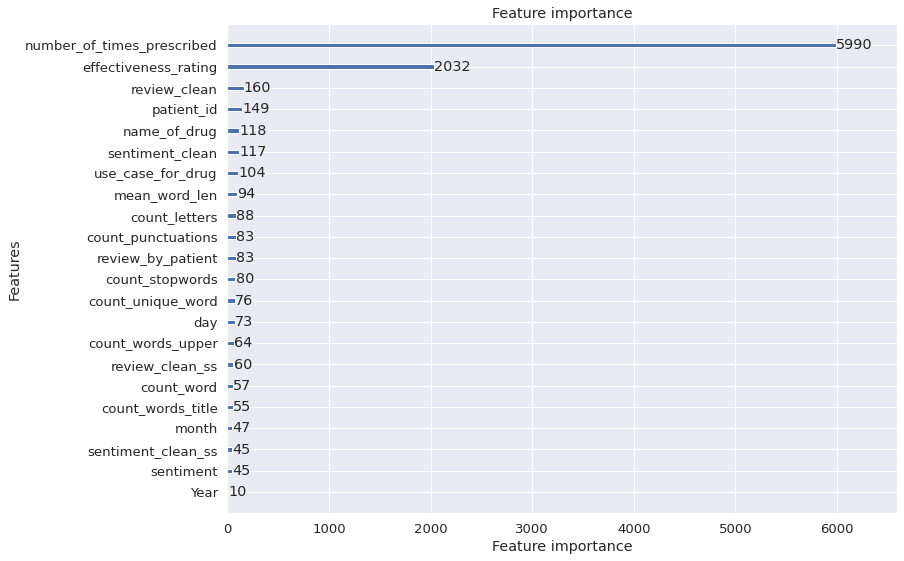

In [94]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

<ul>
    <li style="font-size:150%;">Above figure depicts the feature importance plot using the LightGBM. It can be inferred that the most importance feature is the mean word length and after that the condition of the patient. The least important feature of them all is the upper-case word count.</li>
<ul>

<center style="font-family:cursive;"><h1 style="font-size:200%; padding: 20px; background: #001f3f;"><i><b style="color:orange;">CONCLUSION</b></i></h1></center>   

Some of the features are not much important to consider in fact they increases the model complexity hence we can discard these features to make our model looks more simple and ultimately reduces the complexity
